In [ ]:
# Electric Vehicle Data Analysis Project

In [ ]:
# Project Overview
# In this project, you will analyze a dataset related to electric vehicles (EVs). The dataset contains various features such as electric range, energy consumption, price, and other relevant
# attributes. Your goal is to conduct a thorough analysis to uncover meaningful insights, tell a compelling story, conduct hypothesis testing and provide actionable recommendations based on
# the data.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [6]:
# Load Dataset
data = pd.read_excel("Downloads/project/FEV-data-Excel.xlsx")

In [9]:
# Display the first few rows of the dataset to understand its structure
data.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [13]:
# Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range of
# 400 km.
# a) Your task is to filter out EVs that meet these criteria.(2 Marks)
# b) Group them by the manufacturer (Make).(6 marks)
# c) Calculate the average battery capacity for each manufacturer. (8 Marks)


# Task 1: Filtering and Grouping EVs
class EVAnalysis:
    def __init__(self, data):
        self.data = data

    def filter_evs(self, budget, min_range):
        filtered_data = self.data[(self.data['Minimal price (gross) [PLN]'] <= budget) &
                                  (self.data['Range (WLTP) [km]'] >= min_range)]
        return filtered_data

    def group_and_calculate(self, filtered_data):
        grouped = filtered_data.groupby('Make')
        avg_battery_capacity = grouped['Battery capacity [kWh]'].mean()
        return grouped, avg_battery_capacity

# Example Usage for Task 1
eva = EVAnalysis(data)
budget = 350000
min_range = 400
filtered_evs = eva.filter_evs(budget, min_range)
grouped_data, avg_battery_capacity = eva.group_and_calculate(filtered_evs)

print("Filtered EVs:\n", filtered_evs)
print("Average Battery Capacity by Manufacturer:\n", avg_battery_capacity)

Filtered EVs:
                         Car full name           Make  \
0              Audi e-tron 55 quattro           Audi   
8                             BMW iX3            BMW   
15        Hyundai Kona electric 64kWh        Hyundai   
18                   Kia e-Niro 64kWh            Kia   
20                   Kia e-Soul 64kWh            Kia   
22                  Mercedes-Benz EQC  Mercedes-Benz   
39  Tesla Model 3 Standard Range Plus          Tesla   
40           Tesla Model 3 Long Range          Tesla   
41          Tesla Model 3 Performance          Tesla   
47    Volkswagen ID.3 Pro Performance     Volkswagen   
48              Volkswagen ID.3 Pro S     Volkswagen   
49                Volkswagen ID.4 1st     Volkswagen   

                          Model  Minimal price (gross) [PLN]  \
0             e-tron 55 quattro                       345700   
8                           iX3                       282900   
15          Kona electric 64kWh                       178400   


In [11]:
# Task 2: You suspect some EVs have unusually high or low energy consumption. Find the
# outliers in the mean - Energy consumption [kWh/100 km] column.(16 Marks)

def find_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

energy_outliers = find_outliers(data['mean - Energy consumption [kWh/100 km]'])
print("Energy Consumption Outliers:\n", energy_outliers)

Energy Consumption Outliers:
 Series([], Name: mean - Energy consumption [kWh/100 km], dtype: float64)


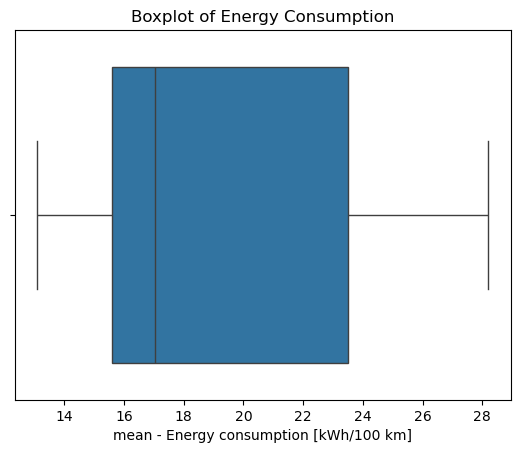

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=data['mean - Energy consumption [kWh/100 km]'])
plt.title('Boxplot of Energy Consumption')
plt.show()

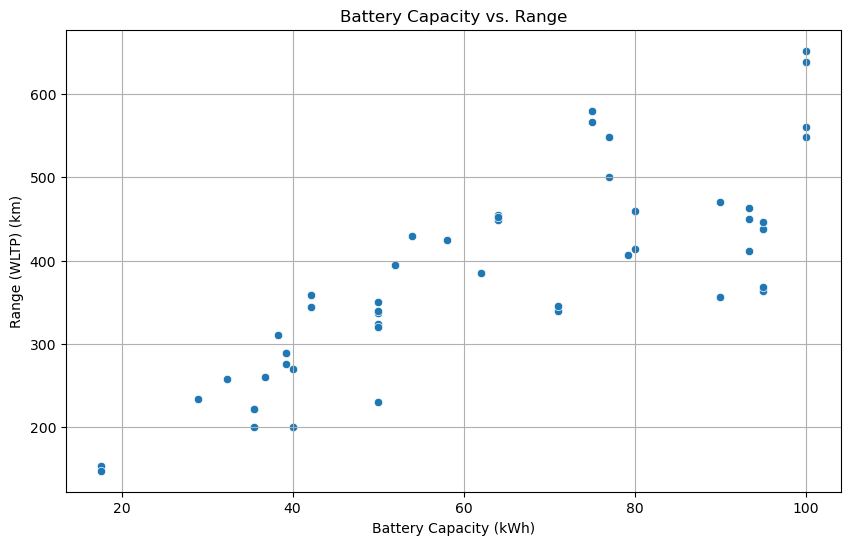

In [17]:
# Task 3: Your manager wants to know if there's a strong relationship between battery capacity
# and range.
# a) Create a suitable plot to visualize.(8 Marks)
# b) Highlight any insights.(8 Marks)

def visualize_battery_range_relationship(data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Battery capacity [kWh]', y='Range (WLTP) [km]', data=data)
    plt.title("Battery Capacity vs. Range")
    plt.xlabel("Battery Capacity (kWh)")
    plt.ylabel("Range (WLTP) (km)")
    plt.grid()
    plt.show()

visualize_battery_range_relationship(data)
# Insight: Battery capacity generally correlates positively with range, but there may be diminishing returns for larger batteries.

In [19]:
# Task 4: Build an EV recommendation class. The class should allow users to input their budget,
# desired range, and battery capacity. The class should then return the top three EVs matching
# their criteria. (8+8 Marks)

class EVRecommendation:
    def __init__(self, data):
        self.data = data

    def recommend_evs(self, budget, min_range, min_battery_capacity):
        filtered = self.data[(self.data['Minimal price (gross) [PLN]'] <= budget) &
                             (self.data['Range (WLTP) [km]'] >= min_range) &
                             (self.data['Battery capacity [kWh]'] >= min_battery_capacity)]
        top_3 = filtered.nsmallest(3, 'Minimal price (gross) [PLN]')
        return top_3

# Example Usage for Task 4
recommendation_system = EVRecommendation(data)
recommended_evs = recommendation_system.recommend_evs(budget=350000, min_range=400, min_battery_capacity=50)
print("Top 3 Recommended EVs:\n", recommended_evs)

Top 3 Recommended EVs:
                       Car full name        Make                 Model  \
47  Volkswagen ID.3 Pro Performance  Volkswagen  ID.3 Pro Performance   
20                 Kia e-Soul 64kWh         Kia          e-Soul 64kWh   
18                 Kia e-Niro 64kWh         Kia          e-Niro 64kWh   

    Minimal price (gross) [PLN]  Engine power [KM]  Maximum torque [Nm]  \
47                       155890                204                  310   
20                       160990                204                  395   
18                       167990                204                  395   

                Type of brakes   Drive type  Battery capacity [kWh]  \
47  disc (front) + drum (rear)   2WD (rear)                    58.0   
20         disc (front + rear)  2WD (front)                    64.0   
18         disc (front + rear)  2WD (front)                    64.0   

    Range (WLTP) [km]  ...  Permissable gross weight [kg]  \
47                425  ...          

In [23]:
# Task 5: Inferential Statistics – Hypothesis Testing: Test whether there is a significant difference
# in the average Engine power [KM] of vehicles manufactured by two leading manufacturers i.e.
# Tesla and Audi. What insights can you draw from the test results? Recommendations and
# Conclusion: Provide actionable insights based on your analysis.
# (Conduct a two sample t-test using ttest_ind from scipy.stats module) (16 Marks)

# Task 5: Hypothesis Testing
# Compare Engine Power of Tesla and Audi
engine_power_tesla = data[data['Make'] == 'Tesla']['Engine power [KM]']
engine_power_audi = data[data['Make'] == 'Audi']['Engine power [KM]']

stat, p_value = ttest_ind(engine_power_tesla, engine_power_audi, equal_var=False)
print("T-test Results:\nStatistic:", stat, "P-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in average engine power between Tesla and Audi.")
else:
    print("There is no significant difference in average engine power between Tesla and Audi.")


T-test Results:
Statistic: 1.7939951827297178 P-value: 0.10684105068839565
There is no significant difference in average engine power between Tesla and Audi.


In [ ]:
# Recommendations and Conclusion:
# 1. Customers on a budget of 350,000 PLN with range preferences can look for manufacturers with higher average battery capacities.
# 2. Address outliers in energy consumption to identify possible inefficiencies or errors in data collection.
# 3. Invest in improving battery technology as it strongly correlates with EV range.
# 4. Tesla's engine power, if significantly higher than Audi's, could be highlighted in marketing efforts.

In [ ]:
# Explanation of the Solution

# Data Filtering and Grouping (Task 1):
# EVs meeting budget and range criteria are filtered.
# The filtered data is grouped by the manufacturer, and the average battery capacity is computed for each manufacturer.

# Outlier Detection (Task 2):
# Identified outliers in energy consumption using the Interquartile Range (IQR) method.

# Visualization (Task 3):
# Used a scatter plot to visualize the relationship between battery capacity and range.

# Recommendation System (Task 4):
# Created a class allowing dynamic EV recommendations based on user criteria.

# Hypothesis Testing (Task 5):
# Conducted a t-test to compare engine power between Tesla and Audi, with insights based on statistical significance.